In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv("/home/sathish/Downloads/titanic-training-data.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
columns_to_drop = ["Cabin"]
df=df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [7]:
x1=df[['Embarked','Age']]

<Axes: >

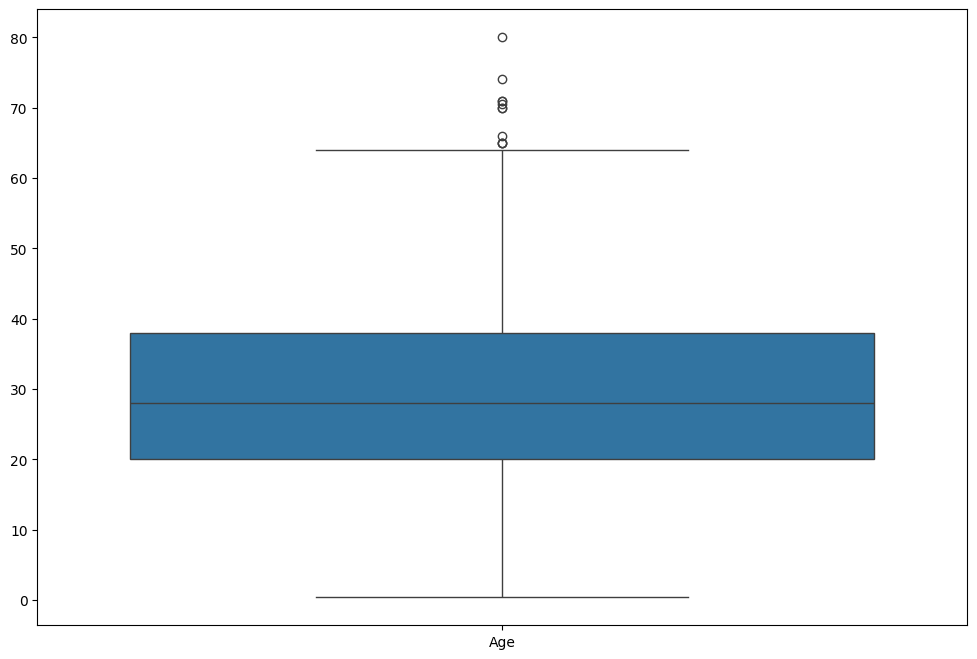

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x1)

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
# Calculate Q1 and Q3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]

In [12]:
df.shape

(825, 11)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [15]:
x=df[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

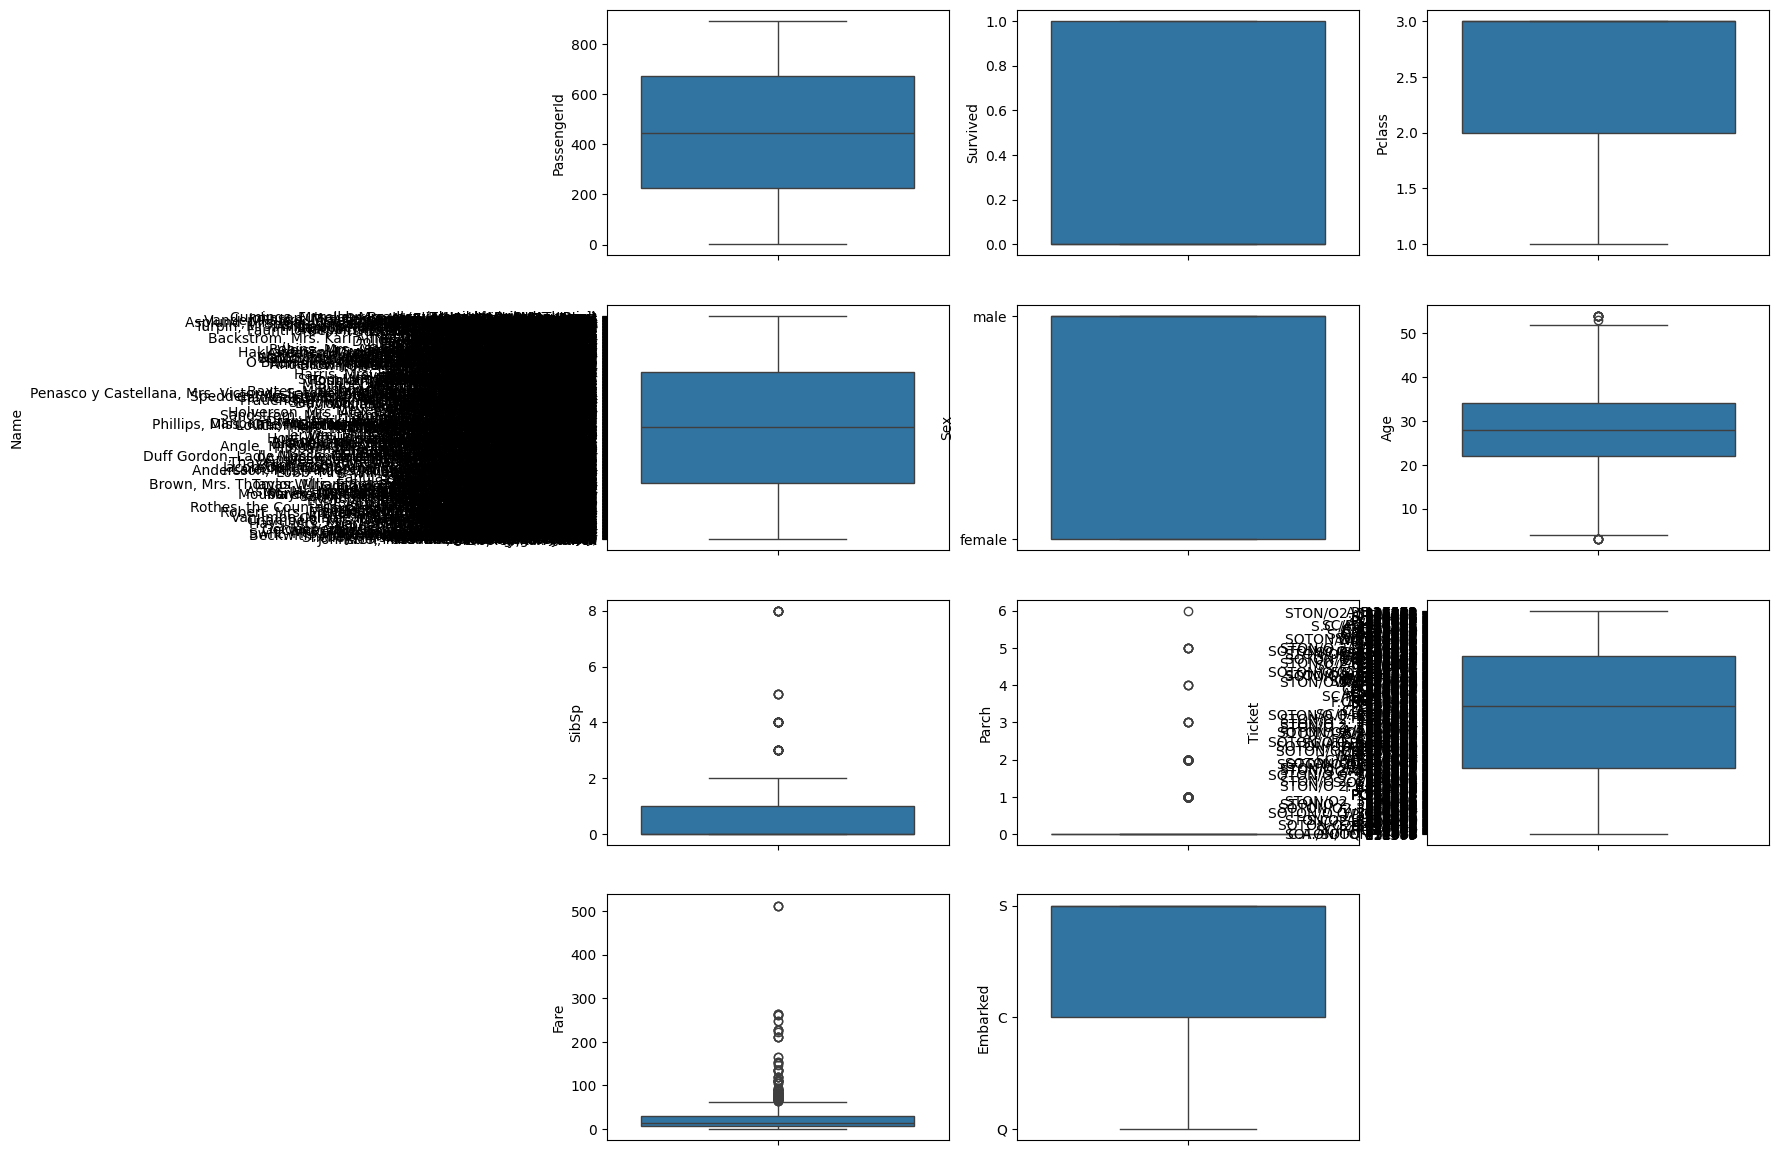

In [16]:
plt.figure(figsize=(15,30))
for i in range(len(x.columns)):
    plt.subplot(8,3,i+1)
    sns.boxplot(y=x.columns[i],data=x)
plt.show()

In [17]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"], dtype=int)

In [18]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0,1,0,0


In [19]:
# unwanted_columns=['PassengerId','Name','Ticket','Fare']

In [20]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [21]:
df

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,1,0,1,0,0,0,1
887,1,19.0,0,0,1,0,1,0,0,0,0,1
888,0,28.0,1,2,1,0,0,0,1,0,0,1
889,1,26.0,0,0,0,1,1,0,0,1,0,0


In [22]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

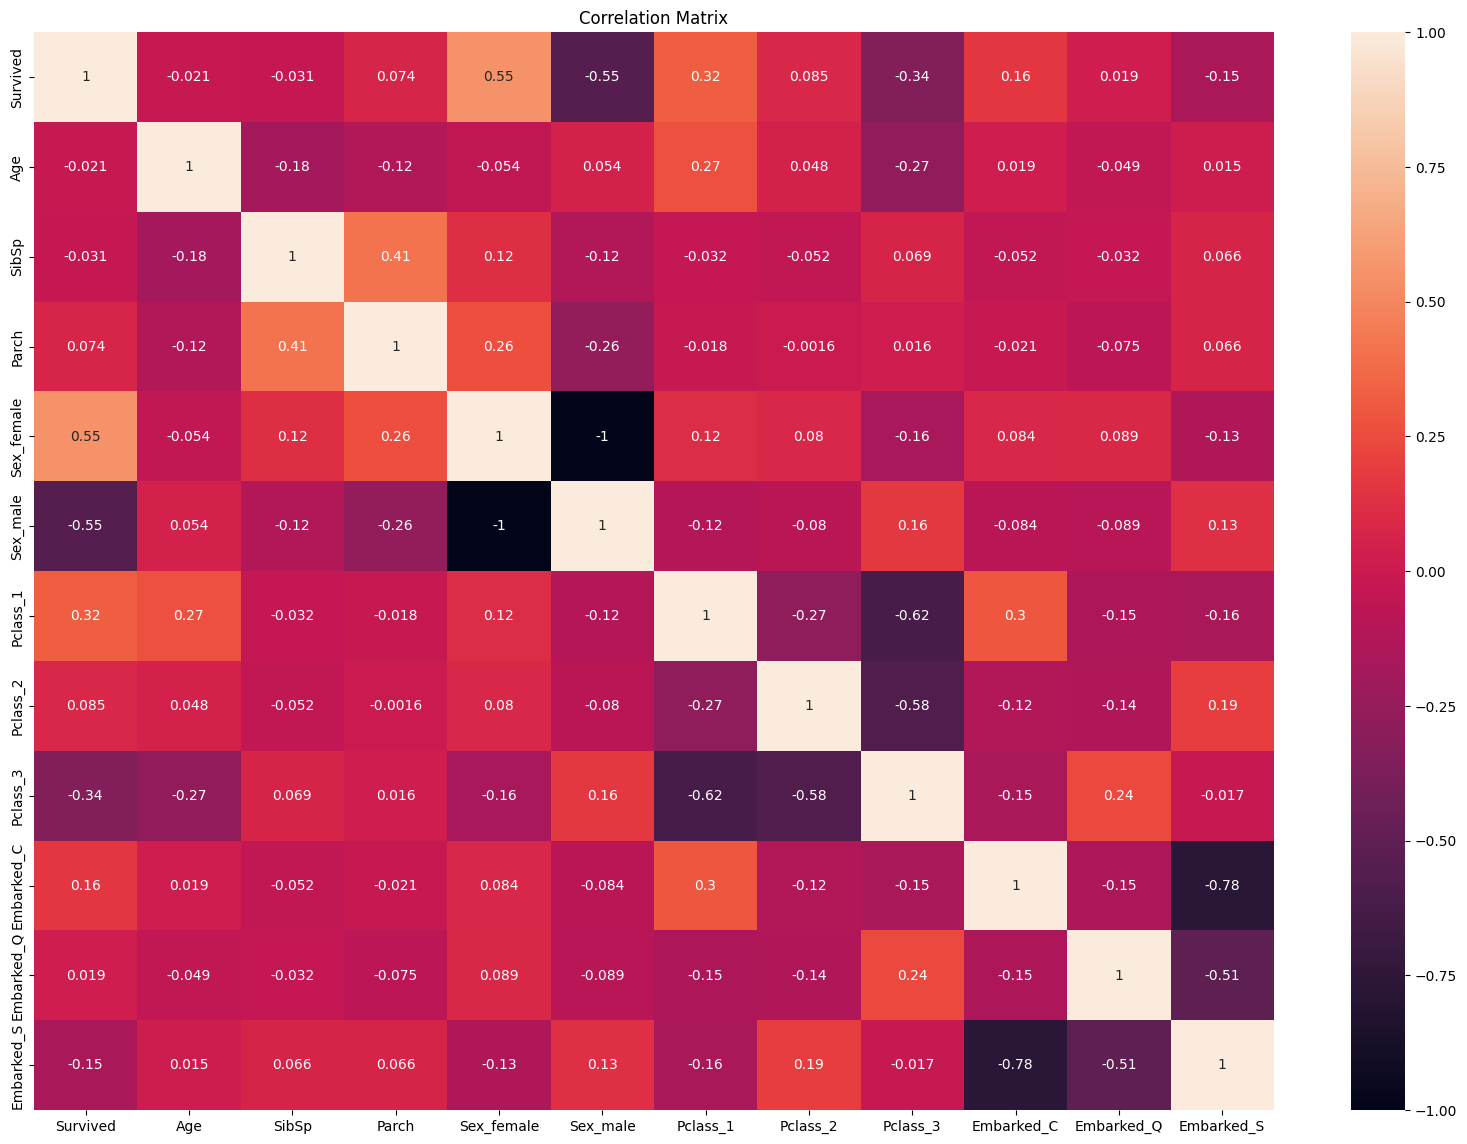

In [23]:
correlation_matrix=df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

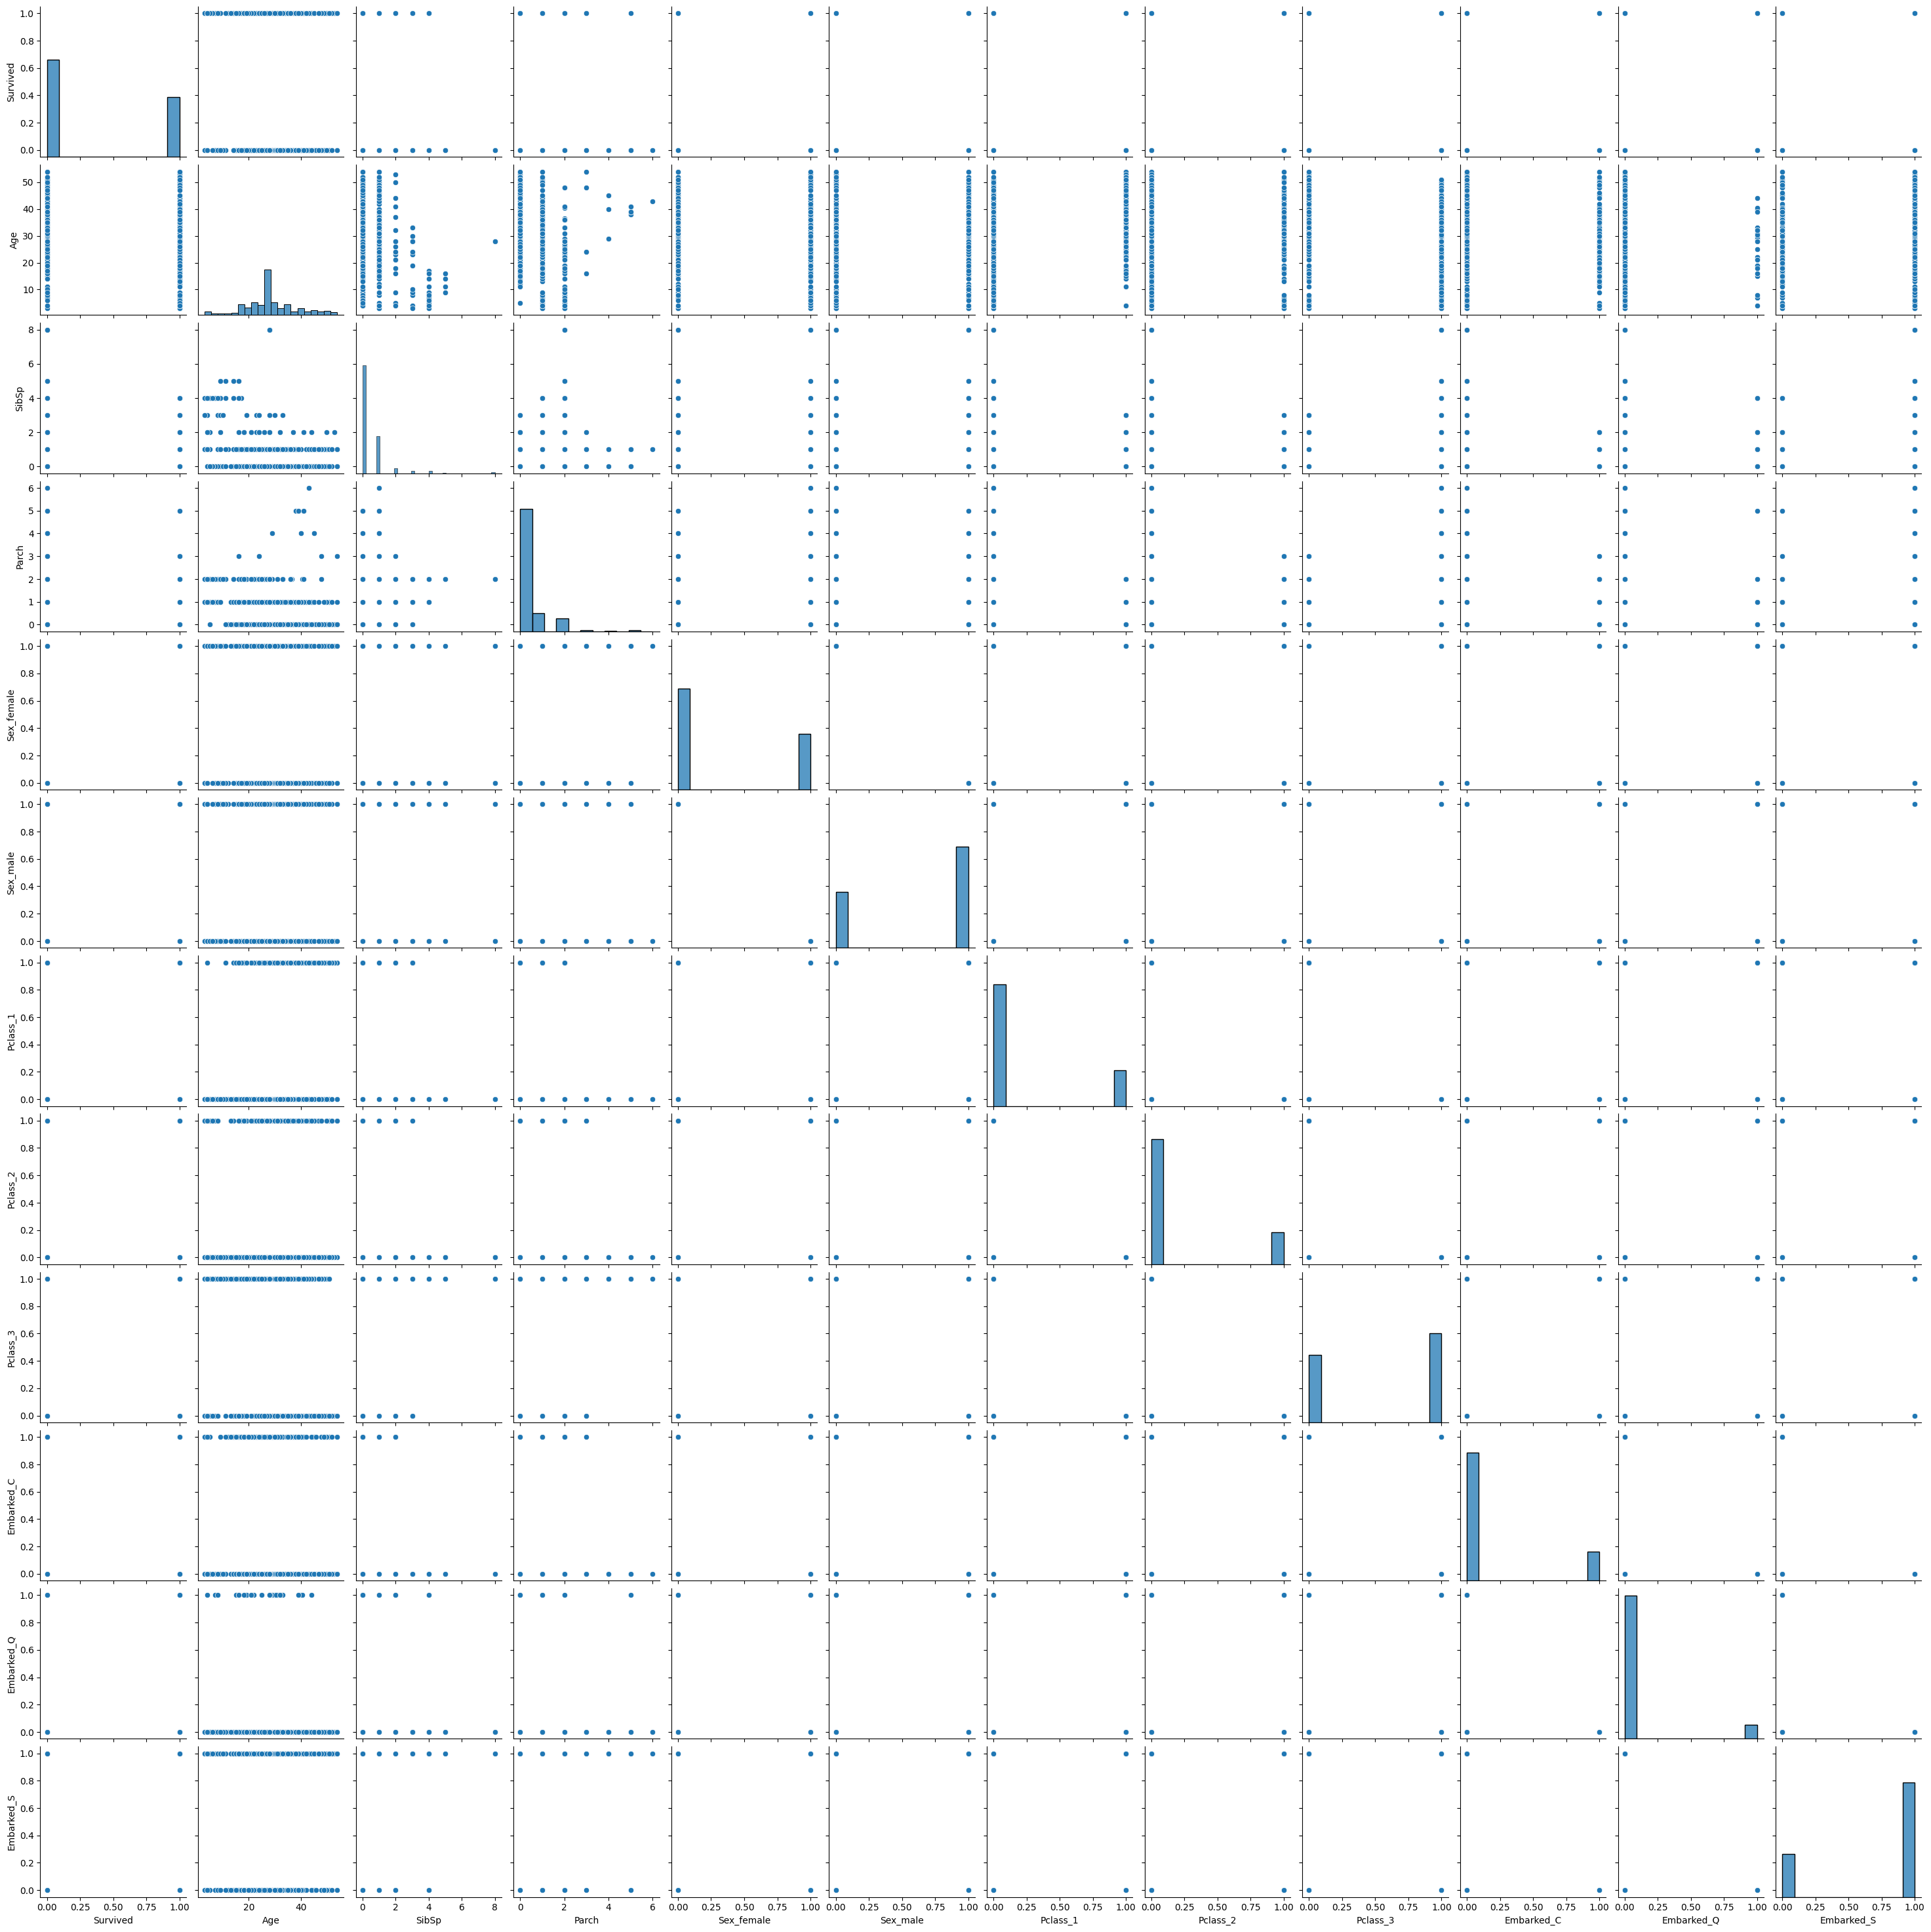

In [107]:
sns.pairplot(df)

In [24]:
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
# split into x and y

x=df.drop("Survived",axis=1)
y=df["Survived"]

In [26]:
x

,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,0,0,1,0,0,1
1,38.0,1,0,1,0,1,0,0,1,0,0
2,26.0,0,0,1,0,0,0,1,0,0,1
3,35.0,1,0,1,0,1,0,0,0,0,1
4,35.0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,1,0,1,0,0,0,1
887,19.0,0,0,1,0,1,0,0,0,0,1
888,28.0,1,2,1,0,0,0,1,0,0,1
889,26.0,0,0,0,1,1,0,0,1,0,0


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 825, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[['Age']]=scaler.fit_transform(x_train[['Age']])
x_train.head()

,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
36,-0.052889,0,0,0,1,0,0,1,1,0,0
747,0.149545,0,0,1,0,0,1,0,0,0,1
778,-0.052889,0,0,0,1,0,0,1,0,1,0
880,-0.356540,0,1,1,0,0,1,0,0,0,1
691,-2.482099,0,1,1,0,0,0,1,1,0,0


In [30]:
churn=(sum(df['Survived'])/len(df['Survived'].index))*100
churn

38.06060606060606

In [31]:
import statsmodels.api as sm

In [32]:
#import statsmodels.api as sm
#x_train=sm.add_constant(df_train)
#lm=sm.OLS(y_train,x_train).fit()
#print(lm.summary())

x_train_sm=sm.add_constant(x_train)
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      568
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.83
Date:                Mon, 12 Aug 2024   Deviance:                       485.66
Time:                        11:13:49   Pearson chi2:                     604.
No. Iterations:                    72   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2262      0.086      2.632      0.008       0.058       0.395
Age           -0.2738      0.121     -2.256      0.024      -0.512      -0.036
SibSp         -0.2759      0.133     -2.074      0.038      -0.537      -0.015
Parch         -0.1546      0.136     -1.136      0.256      -0.421       0.112
Sex_female     1.5668      0.146     10.732      0.000       1.281       1.853
Sex_male      -1.3405      0.129    -10.355      0.000      -1.594      -1.087
Pclass_1       1.2652      0.209      6.063      0.000       0.856       1.674
Pclass_2       0.1564      0.194      0.806      0.420      -0.224       0.537
Pclass_3      -1.1953      0.166     -7.214      0.000      -1.520      -0.871
Embarked_C     0.1430      0.234      0.611      0.541      -0.316       0.602
Embarked_Q     0.2700      0.308      0.876      0.381      -0.334       0.874
Embarked_S    -0.1867      0.172     -1.083      0.279      -0.525       0.151
==============================================================================
"""

In [33]:

x_train_sm = x_train.drop('Embarked_C', axis=1)
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      568
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.83
Date:                Mon, 12 Aug 2024   Deviance:                       485.66
Time:                        11:13:49   Pearson chi2:                     604.
No. Iterations:                    16   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2738      0.121     -2.256      0.024      -0.512      -0.036
SibSp         -0.2759      0.133     -2.074      0.038      -0.537      -0.015
Parch         -0.1546      0.136     -1.136      0.256      -0.421       0.112
Sex_female     1.7883      0.233      7.686      0.000       1.332       2.244
Sex_male      -1.1190      0.194     -5.769      0.000      -1.499      -0.739
Pclass_1       1.4128      0.217      6.521      0.000       0.988       1.838
Pclass_2       0.3041      0.236      1.288      0.198      -0.159       0.767
Pclass_3      -1.0476      0.204     -5.127      0.000      -1.448      -0.647
Embarked_Q     0.1270      0.498      0.255      0.799      -0.849       1.103
Embarked_S    -0.3297      0.309     -1.067      0.286      -0.935       0.276
==============================================================================
"""

In [34]:

x_train_sm = x_train_sm.drop('Embarked_Q', axis=1)
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      569
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.86
Date:                Mon, 12 Aug 2024   Deviance:                       485.72
Time:                        11:13:50   Pearson chi2:                     603.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2710      0.121     -2.241      0.025      -0.508      -0.034
SibSp         -0.2770      0.133     -2.082      0.037      -0.538      -0.016
Parch         -0.1585      0.135     -1.172      0.241      -0.424       0.107
Sex_female     1.8159      0.207      8.784      0.000       1.411       2.221
Sex_male      -1.0989      0.177     -6.219      0.000      -1.445      -0.753
Pclass_1       1.4165      0.217      6.541      0.000       0.992       1.841
Pclass_2       0.3193      0.228      1.398      0.162      -0.128       0.767
Pclass_3      -1.0188      0.170     -6.010      0.000      -1.351      -0.687
Embarked_S    -0.3696      0.266     -1.389      0.165      -0.891       0.152
==============================================================================
"""

In [35]:

x_train_sm = x_train_sm.drop('Parch', axis=1)
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      570
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Aug 2024   Deviance:                       15013.
Time:                        11:13:50   Pearson chi2:                 7.34e+17
No. Iterations:                    60   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age        -1.702e+14   2.97e+06  -5.72e+07      0.000    -1.7e+14    -1.7e+14
SibSp      -2.405e+14   2.46e+06  -9.79e+07      0.000   -2.41e+14   -2.41e+14
Sex_female  7.123e+14   4.54e+06   1.57e+08      0.000    7.12e+14    7.12e+14
Sex_male   -1.163e+15   4.56e+06  -2.55e+08      0.000   -1.16e+15   -1.16e+15
Pclass_1   -3.261e+14   5.24e+06  -6.23e+07      0.000   -3.26e+14   -3.26e+14
Pclass_2   -8.451e+14   5.94e+06  -1.42e+08      0.000   -8.45e+14   -8.45e+14
Pclass_3    7.209e+14   4.13e+06   1.74e+08      0.000    7.21e+14    7.21e+14
Embarked_S  1.378e+14   6.57e+06    2.1e+07      0.000    1.38e+14    1.38e+14
==============================================================================
"""

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

vif

,features,VIF
2,Sex_female,inf
3,Sex_male,inf
4,Pclass_1,inf
5,Pclass_2,inf
6,Pclass_3,inf
0,Age,1.13
7,Embarked_S,1.10
1,SibSp,1.06


In [38]:
x_train_sm=x_train_sm.drop('Sex_female',axis=1)
x_train_sm

,Age,SibSp,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_S
36,-0.052889,0,1,0,0,1,0
747,0.149545,0,0,0,1,0,1
778,-0.052889,0,1,0,0,1,0
880,-0.356540,0,0,0,1,0,1
691,-2.482099,0,0,0,0,1,0
...,...,...,...,...,...,...,...
59,-1.773580,5,1,0,0,1,1
379,-0.963843,0,1,0,0,1,1
86,-1.267494,1,1,0,0,1,1
857,2.275104,0,1,1,0,0,1


In [39]:
vif = pd.DataFrame()
vif['features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

vif

,features,VIF
5,Pclass_3,3.85
4,Pclass_2,2.02
3,Pclass_1,1.66
0,Age,1.13
6,Embarked_S,1.10
2,Sex_male,1.08
1,SibSp,1.06


In [43]:
churn=(sum(df['Survived'])/len(df['Survived'].index))*100
churn

38.06060606060606

In [45]:
res

In [47]:

x_train_sm = x_train_sm
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      570
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -243.57
Date:                Mon, 12 Aug 2024   Deviance:                       487.14
Time:                        12:41:32   Pearson chi2:                     605.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2801      0.121     -2.324      0.020      -0.516      -0.044
SibSp         -0.3192      0.130     -2.456      0.014      -0.574      -0.064
Sex_male      -2.8327      0.250    -11.351      0.000      -3.322      -2.344
Pclass_1       3.1506      0.356      8.851      0.000       2.453       3.848
Pclass_2       2.0612      0.356      5.784      0.000       1.363       2.760
Pclass_3       0.7038      0.272      2.590      0.010       0.171       1.236
Embarked_S    -0.3864      0.265     -1.459      0.145      -0.906       0.133
==============================================================================
"""

In [49]:

x_train_sm = x_train_sm.drop('Embarked_S', axis=1)
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      571
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -244.63
Date:                Mon, 12 Aug 2024   Deviance:                       489.25
Time:                        12:42:33   Pearson chi2:                     602.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3800
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2964      0.120     -2.480      0.013      -0.531      -0.062
SibSp         -0.3472      0.130     -2.679      0.007      -0.601      -0.093
Sex_male      -2.8751      0.249    -11.567      0.000      -3.362      -2.388
Pclass_1       2.9633      0.326      9.080      0.000       2.324       3.603
Pclass_2       1.7470      0.280      6.250      0.000       1.199       2.295
Pclass_3       0.4686      0.216      2.167      0.030       0.045       0.892
==============================================================================
"""

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [58]:
lm=rfe.fit(x_train_sm, y_train)

In [59]:
col=rfe.support_col=x_train_sm.columns[rfe.support_]
col

Index(['Age', 'SibSp', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'], dtype='object')

In [60]:
col=x_train_sm.columns[rfe.support_]

In [61]:
col

Index(['Age', 'SibSp', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'], dtype='object')

In [62]:
lm

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [63]:
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  577
Model:                            GLM   Df Residuals:                      571
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -244.67
Date:                Mon, 12 Aug 2024   Deviance:                       489.33
Time:                        12:49:29   Pearson chi2:                     585.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3799
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2701      0.147      8.614      0.000       0.981       1.559
Age           -0.2861      0.121     -2.365      0.018      -0.523      -0.049
SibSp         -0.3428      0.124     -2.754      0.006      -0.587      -0.099
Sex_male      -2.8137      0.247    -11.380      0.000      -3.298      -2.329
Pclass_1       1.6392      0.210      7.788      0.000       1.227       2.052
Pclass_2       0.4416      0.187      2.361      0.018       0.075       0.808
Pclass_3      -0.8107      0.159     -5.105      0.000      -1.122      -0.499
==============================================================================
"""

In [64]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

36     0.087925
747    0.841423
778    0.087925
880    0.859801
691    0.763044
611    0.087925
337    0.927434
254    0.524488
301    0.046312
756    0.087925
dtype: float64

In [65]:
y_train_pred_final=pd.DataFrame({'Survived':y_train.values,'Survived_pred':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Survived,Survived_pred,CustID
36,1,0.087925,36
747,1,0.841423,747
778,0,0.087925,778
880,1,0.859801,880
691,1,0.763044,691


In [66]:

y_train_pred_final['predicted']=y_train_pred_final.Survived_pred.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Survived,Survived_pred,CustID,predicted
36,1,0.087925,36,0
747,1,0.841423,747,1
778,0,0.087925,778,0
880,1,0.859801,880,1
691,1,0.763044,691,1


In [67]:
from sklearn import metrics

In [69]:
# confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.predicted)
print(confusion)

[[304  55]
 [ 59 159]]


In [71]:
print(metrics.accuracy_score(y_train_pred_final.Survived,y_train_pred_final.predicted))

0.8024263431542461


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:

vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF']=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Pclass_3,2.67
3,Pclass_1,1.41
4,Pclass_2,1.28
0,Age,1.13
2,Sex_male,1.06
1,SibSp,1.05


In [74]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [75]:
TP/float(TP+FN)

0.7293577981651376

In [76]:
TN/float(TN+FP)

0.8467966573816156

In [77]:
print(FP/float(TN+FP))

0.1532033426183844


In [78]:
print(TP/float(TP+FP))

0.7429906542056075


In [79]:
print(TN/float(TN+FN))

0.837465564738292


In [80]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate or [1 -True Negative rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

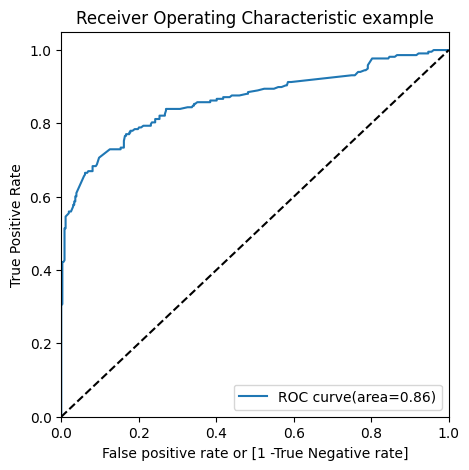

In [81]:
draw_roc(y_train_pred_final.Survived,y_train_pred_final.Survived_pred)

In [82]:
numbers =[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Survived_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_pred,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
36,1,0.087925,36,0,1,0,0,0,0,0,0,0,0,0
747,1,0.841423,747,1,1,1,1,1,1,1,1,1,1,0
778,0,0.087925,778,0,1,0,0,0,0,0,0,0,0,0
880,1,0.859801,880,1,1,1,1,1,1,1,1,1,1,0
691,1,0.763044,691,1,1,1,1,1,1,1,1,1,0,0


In [83]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [85]:
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1

    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377816  1.000000  0.000000
0.1   0.1  0.629116  0.894495  0.467967
0.2   0.2  0.719237  0.857798  0.635097
0.3   0.3  0.769497  0.834862  0.729805
0.4   0.4  0.788562  0.793578  0.785515
0.5   0.5  0.802426  0.729358  0.846797
0.6   0.6  0.833622  0.665138  0.935933
0.7   0.7  0.816291  0.532110  0.988858
0.8   0.8  0.778163  0.426606  0.991643
0.9   0.9  0.708839  0.229358  1.000000


<Axes: xlabel='prob'>

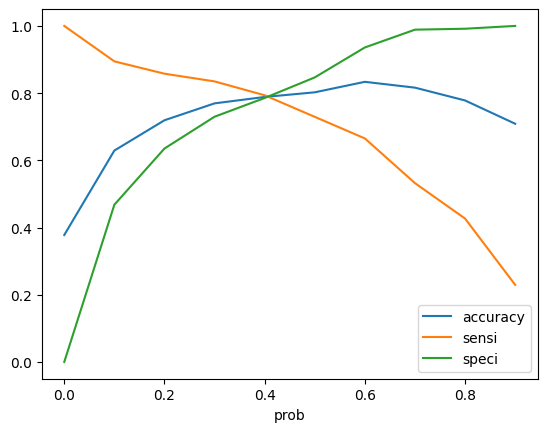

In [86]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [87]:
y_train_pred_final['final_predicted']=y_train_pred_final.Survived_pred.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()


,Survived,Survived_pred,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
36,1,0.087925,36,0,1,0,0,0,0,0,0,0,0,0,0
747,1,0.841423,747,1,1,1,1,1,1,1,1,1,1,0,1
778,0,0.087925,778,0,1,0,0,0,0,0,0,0,0,0,0
880,1,0.859801,880,1,1,1,1,1,1,1,1,1,1,0,1
691,1,0.763044,691,1,1,1,1,1,1,1,1,1,0,0,1


In [89]:
print(metrics.accuracy_score(y_train_pred_final.Survived,y_train_pred_final.predicted))

0.8024263431542461


In [90]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.final_predicted)
confusion2

array([[282,  77],
       [ 45, 173]])

In [91]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [92]:
TP/float(TP+FN)


0.7935779816513762

In [93]:
TN/float(TN+FP)

0.7855153203342619

In [94]:
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.21448467966573817
0.692
0.8623853211009175


## precision and recall

In [95]:
confusion=metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.final_predicted)
confusion

array([[282,  77],
       [ 45, 173]])

In [96]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.692

In [97]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7935779816513762

In [98]:
from sklearn.metrics import precision_score,recall_score

In [99]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [101]:
precision_score(y_train_pred_final.Survived,y_train_pred_final.final_predicted)

0.692

## Precision and recall tradeoff

In [102]:
from sklearn.metrics import precision_recall_curve

In [103]:
y_train_pred_final.Survived,y_train_pred_final.predicted

(36     1
 747    1
 778    0
 880    1
 691    1
       ..
 59     0
 379    0
 86     0
 857    1
 563    0
 Name: Survived, Length: 577, dtype: int64,
 36     0
 747    1
 778    0
 880    1
 691    1
       ..
 59     0
 379    0
 86     0
 857    0
 563    0
 Name: predicted, Length: 577, dtype: int64)

In [105]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Survived,y_train_pred_final.Survived_pred)

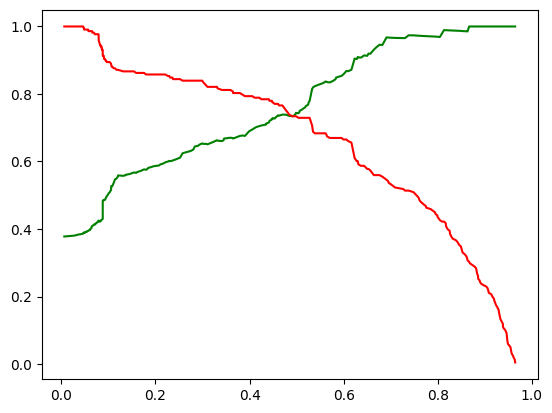

In [106]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

## 11 . Making prediction on test set

In [108]:
x_test[['Age']]=scaler.transform(x_test[['Age']])

In [109]:
x_test=x_test[col]
x_test.head()

,Age,SibSp,Sex_male,Pclass_1,Pclass_2,Pclass_3
576,0.554414,0,0,0,1,0
700,-1.065060,1,0,1,0,0
838,0.351979,0,1,0,0,1
23,-0.052889,0,1,1,0,0
759,0.453196,0,0,1,0,0


In [110]:
x_test_sm=sm.add_constant(x_test)

In [111]:
y_test_pred=res.predict(x_test_sm)

In [112]:
y_pred_1=pd.DataFrame(y_test_pred)

In [113]:
y_pred_1.head()

,0
576,0.825350
700,0.946399
838,0.079069
23,0.527636
759,0.941562


In [114]:
y_test_df=pd.DataFrame(y_test)

In [115]:
y_test_df['CustID']=y_test_df.index

In [116]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [117]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [118]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [119]:
y_pred_final.head()

,Survived,CustID,0
0,1,576,0.825350
1,1,700,0.946399
2,1,838,0.079069
3,1,23,0.527636
4,1,759,0.941562


In [120]:
y_pred_final=y_pred_final.rename(columns={0:'Survived_pred'})

In [121]:
y_pred_final = y_pred_final.reindex(columns=['CustID','Survived','Survived_pred'])

In [122]:
y_pred_final.head()

,CustID,Survived,Survived_pred
0,576,1,0.825350
1,700,1,0.946399
2,838,1,0.079069
3,23,1,0.527636
4,759,1,0.941562


In [124]:
y_pred_final['final_predicted']=y_pred_final.Survived_pred.map(lambda x: 1 if x > 0.4 else 0)

In [125]:
y_pred_final.head()

,CustID,Survived,Survived_pred,final_predicted
0,576,1,0.825350,1
1,700,1,0.946399,1
2,838,1,0.079069,0
3,23,1,0.527636,1
4,759,1,0.941562,1


In [126]:
metrics.accuracy_score(y_pred_final.Survived,y_pred_final.final_predicted)

0.7782258064516129

In [127]:
confusion3=metrics.confusion_matrix(y_pred_final.Survived,y_pred_final.final_predicted)
confusion3

array([[121,  31],
       [ 24,  72]])

In [128]:
TP=confusion3[1,1]
TN=confusion3[0,0]
FP=confusion3[0,1]
FN=confusion3[1,0]

In [129]:
TP/float(TP+FN)

0.75

In [130]:
TN/float(TN+FP)

0.7960526315789473

In [131]:
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.20394736842105263
0.6990291262135923
0.8344827586206897
